In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [41]:
dados = pd.read_csv(r'C:\Projetos Data Science\Análise de Dados\SuperMarket Sales\data\supermarket_sales - Sheet1.csv')

In [42]:
# <--- EDA: EXPLORATORY DATA ANALYSIS ( ANÁLISE EXPLORATÓRIA DE DADOS)
#       Exploração da base de dados em busca de explorar detalhes ocultos na estrutura dos dados, 
#       identificar falhas ou comportamentos anormais, descobrir tendências e variáveis relevantes 
#       no conjunto.

In [43]:
# VERIFICAÇÃO DO TAMANHO DA BASE DE DADOS
dados.shape

(1000, 17)

In [44]:
# NOMES DAS COLUNAS
dados.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [45]:
# VISUALIZAÇÃO DOS DADOS
dados.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [46]:
# ESTATISTICAS DA BASE DE DADOS
dados.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [47]:
# INFORMAÇÕES SOBRE TIPO DE DADOS, QTD DE DADOS, DADOS NULOS, PRESENTES NA BASE DE DADOS
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [48]:
# VERIFICAÇÃO DOS CAMPOS NULOS
dados.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [49]:
# DADOS UNICOS EM CADA COLUNA
dados.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [50]:
# <--- TRATAMENTO DA BASE DE DADOS
#       Tratamos as colunas com os tipos de dados corretos, modificamos a estrutura dos 
#       dados para melhor visualização posteriormente.

In [51]:
# TRADUÇÃO DOS NOMES DAS COLUNAS
dados.rename(columns={
    'Invoice ID': 'Código do produto',
    'Branch': 'Filial',
    'City': 'Cidade',
    'Gender': 'Gênero',
    'Product line': 'Linha do produto',
    'Unit price': 'Preço Unitário',
    'Quantity': 'Quantidade',
    'Tax 5%': 'Taxa de 5%',
    'Total': 'Total da compra',
    'Date': 'Data',
    'Time': 'Horário',
    'Payment': 'Tipo do pagamento',
    'cogs': 'Custo bruto no valor total da venda',
    'gross margin percentage': 'Porcentagem em cima do valor da venda',
    'gross income': 'Lucro Bruto',
    'Rating': 'Nota do cliente'
    }, inplace=True)

In [52]:
# TRANSFORMAÇÃO DA COLUNA DIA PARA DATETIME
dados['Dia'] = pd.DatetimeIndex(dados['Data']).strftime('%a')

In [53]:
# <--- ANÁLISE E VISUALIZAÇÃO DOS DADOS
#       Vamos analisar todos os dados presentes na base de dados, afim de extrair
#       informações relevantes.

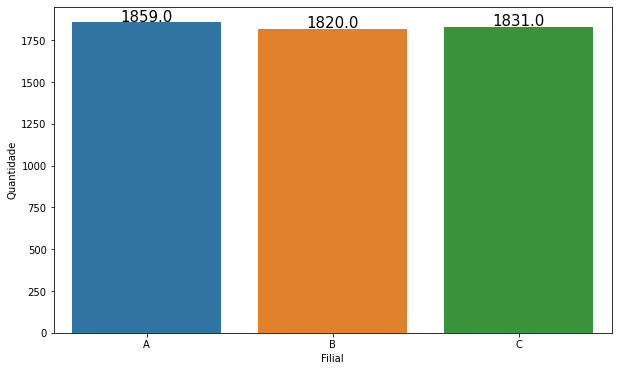

In [54]:
# QUANTIDADE DE VENDAS POR FILIAL
analise = dados.groupby(by=['Filial']).sum()['Quantidade'].reset_index()
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=analise.Filial, y=analise.Quantidade)
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=15,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')

In [55]:
# No gráfico acima podemos ver a quantidade de vendas destribuidas pelas 3 filiais. Em seguida, 
# vamos analisar os tipos/linha de produtos que mais saem em cada filial.

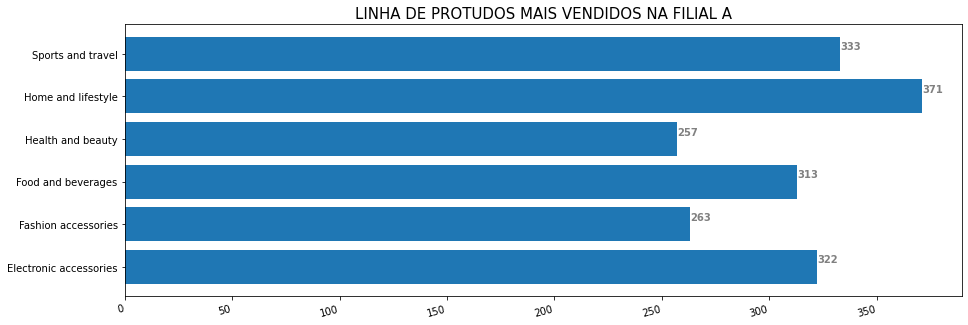

In [56]:
# LINHA DE PROTUDOS MAIS VENDIDOS NA FILIAL A
analise_filial_a = dados.groupby(by=['Filial', 'Linha do produto']).sum()['Quantidade'].reset_index()
analise_filial_a = analise_filial_a.loc[analise_filial_a['Filial'] == 'A']
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(analise_filial_a['Linha do produto'], analise_filial_a['Quantidade'])
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)), 
             fontsize=10, fontweight='bold', 
             color='grey')
plt.title('LINHA DE PROTUDOS MAIS VENDIDOS NA FILIAL A', size=15)
plt.xticks(rotation=15, ha='right')
plt.show()

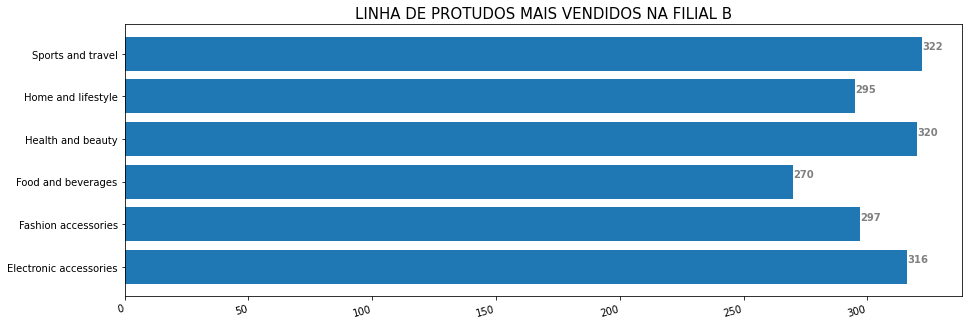

In [57]:
# LINHA DE PROTUDOS MAIS VENDIDOS NA FILIAL B
analise_filial_b = dados.groupby(by=['Filial', 'Linha do produto']).sum()['Quantidade'].reset_index()
analise_filial_b = analise_filial_b.loc[analise_filial_b['Filial'] == 'B']
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(analise_filial_b['Linha do produto'], analise_filial_b['Quantidade'])
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)), 
             fontsize=10, fontweight='bold', 
             color='grey')
plt.title('LINHA DE PROTUDOS MAIS VENDIDOS NA FILIAL B', size=15)
plt.xticks(rotation=15, ha='right')
plt.show()

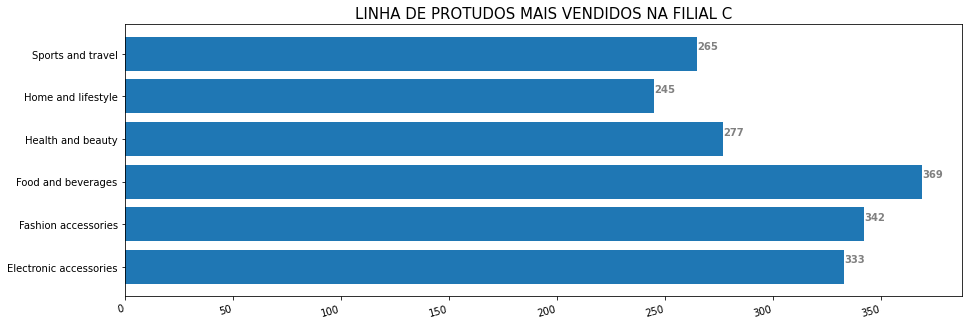

In [58]:
# LINHA DE PROTUDOS MAIS VENDIDOS NA FILIAL C
analise_filial_c = dados.groupby(by=['Filial', 'Linha do produto']).sum()['Quantidade'].reset_index()
analise_filial_c = analise_filial_c.loc[analise_filial_c['Filial'] == 'C']
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(analise_filial_c['Linha do produto'], analise_filial_c['Quantidade'])
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)), 
             fontsize=10, fontweight='bold', 
             color='grey')
plt.title('LINHA DE PROTUDOS MAIS VENDIDOS NA FILIAL C', size=15)
plt.xticks(rotation=15, ha='right')
plt.show()

In [59]:
# QUANTIDADE DE VENDAS/VALOR ARRECADADO POR LINHA DE PRODUTO
dados['Total da compra'] = pd.to_numeric(dados['Total da compra'].apply(lambda line: round(line, 2)))
analise_genero = dados.groupby(by=['Linha do produto']).sum()[['Quantidade', 'Total da compra']].reset_index()
analise_genero

,Linha do produto,Quantidade,Total da compra
0,Electronic accessories,971,54337.50
1,Fashion accessories,902,54305.92
2,Food and beverages,952,56144.91
3,Health and beauty,854,49193.75
4,Home and lifestyle,911,53861.90
5,Sports and travel,920,55122.86


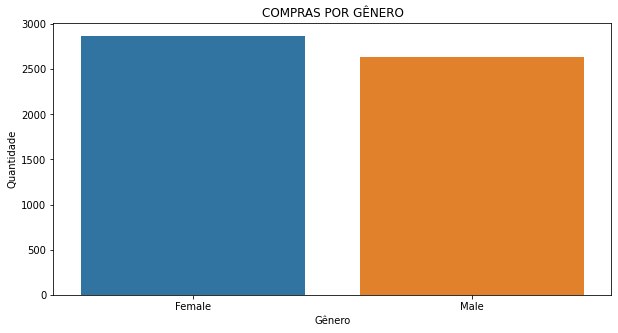

In [60]:
# COMPRAS POR GÊNERO
analise_genero = pd.DataFrame(dados.groupby(by=['Gênero']).sum()['Quantidade']).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(analise_genero['Gênero'], analise_genero['Quantidade'])
plt.title('COMPRAS POR GÊNERO')
plt.show()

In [61]:
# No gráfico acima, mostra que a quantidade de vendas para o gênero feminino é superior a
# quantidade de vendas para o gênero masculino.

[]

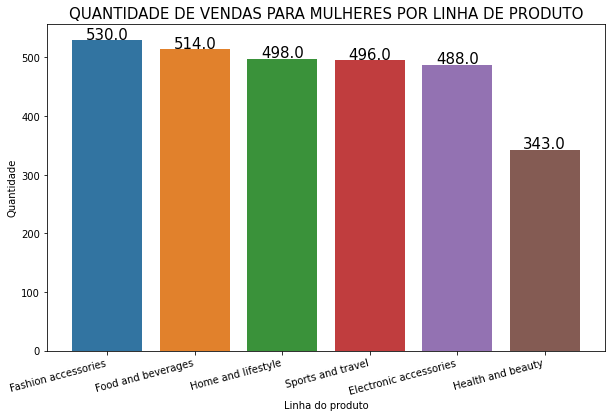

In [62]:
# QUANTIDADE DE VENDAS POR LINHA DE PRODUTO/GÊNERO FEMININO
analise_genero_f = dados.groupby(by=['Linha do produto', 'Gênero']).sum()['Quantidade'].reset_index()
analise_genero_f = analise_genero_f.loc[analise_genero_f['Gênero'] == 'Female'].sort_values('Quantidade', ascending=False).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=analise_genero_f['Linha do produto'], y=analise_genero_f.Quantidade)
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=15,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
plt.title('QUANTIDADE DE VENDAS PARA MULHERES POR LINHA DE PRODUTO', size=15)
plt.xticks(rotation=15, ha='right')
plt.plot()

In [63]:
# Aqui, podemos observar a quantidade de vendas para o publico feminino nas 3 filiais destribuidas
# pelo tipo/linha do produto.

[]

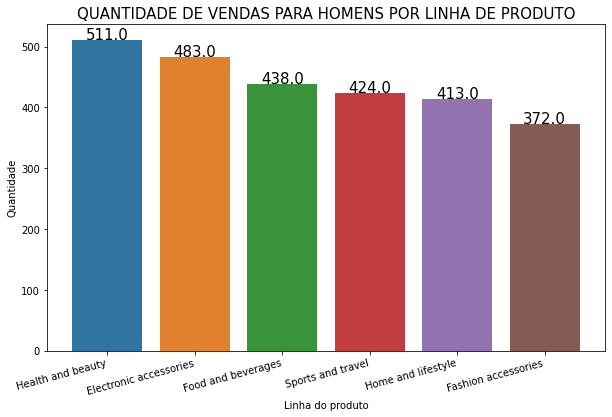

In [64]:
# QUANTIDADE DE VENDAS POR LINHA DE PRODUTO/GÊNERO MASCULINO
analise_genero_m = dados.groupby(by=['Linha do produto', 'Gênero']).sum()['Quantidade'].reset_index()
analise_genero_m = analise_genero_m.loc[analise_genero_m['Gênero'] == 'Male'].sort_values('Quantidade', ascending=False).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=analise_genero_m['Linha do produto'], y=analise_genero_m.Quantidade)
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=15,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
plt.title('QUANTIDADE DE VENDAS PARA HOMENS POR LINHA DE PRODUTO', size=15)
plt.xticks(rotation=15, ha='right')
plt.plot()

In [65]:
# Aqui, podemos observar a quantidade de vendas para o publico masculino nas 3 filiais destribuidas
# pelo tipo/linha do produto.

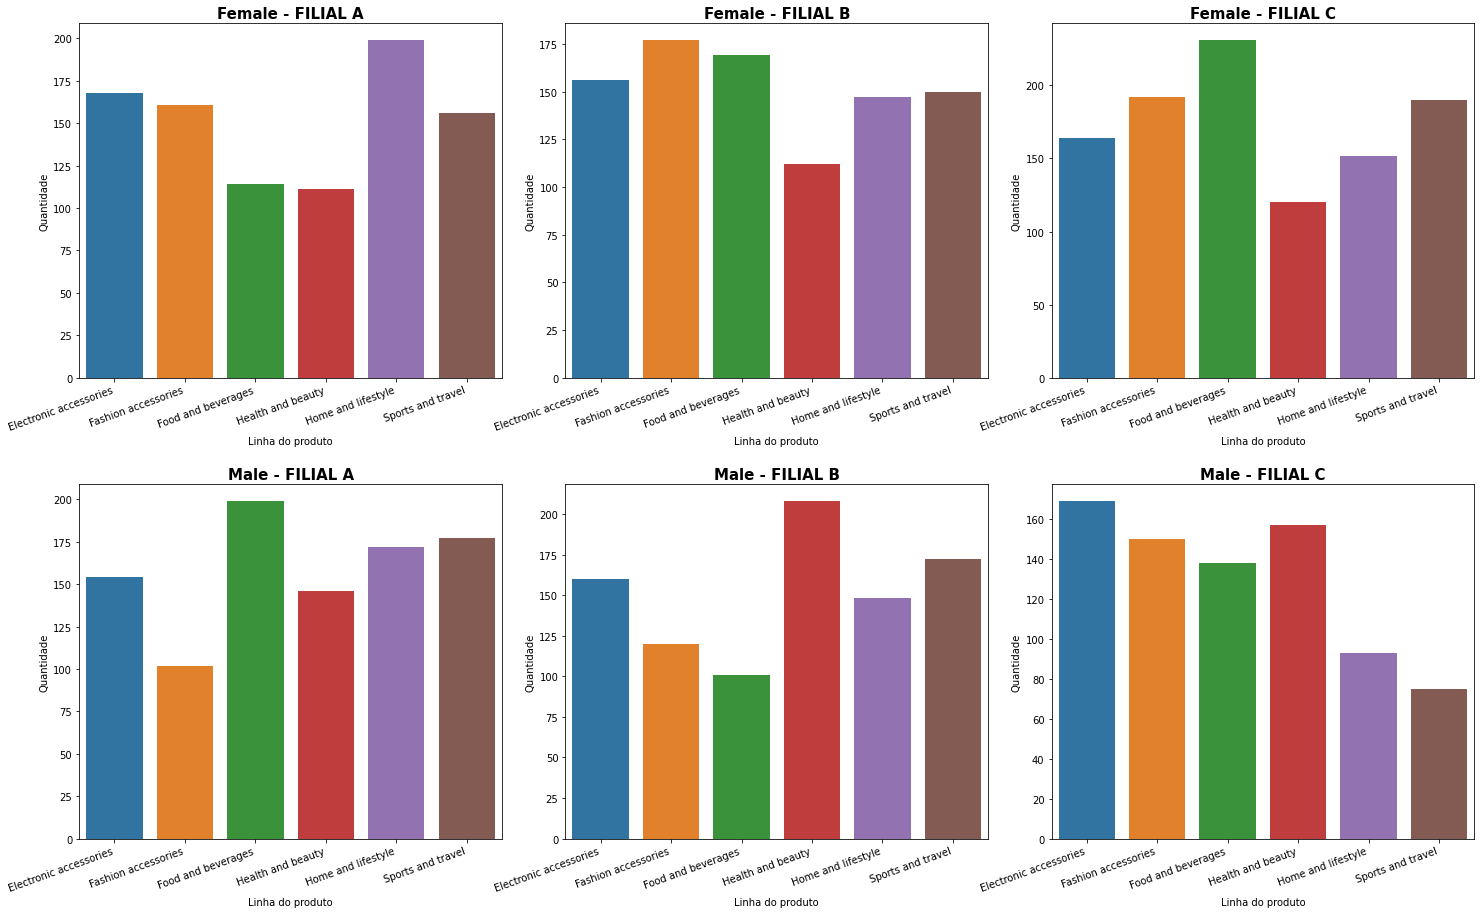

In [66]:
# QUANTIDADE DE VENDAS POR GÊNERO EM CADA FILIAL
dados['Total da compra'] = pd.to_numeric(dados['Total da compra'].apply(lambda line: round(line, 2)))
analise_genero = dados.groupby(by=['Linha do produto', 'Gênero', 'Filial']).sum()[['Quantidade', 'Total da compra']].reset_index()
generos = list(analise_genero['Gênero'].unique())
filiais = list(analise_genero['Filial'].unique())
fig, ax = plt.subplots(figsize=(25, 15))
plt.subplots_adjust(hspace=0.30, wspace=0.15)
for i in range(len(generos)):
    for j in range(len(filiais)):
        filtro = (analise_genero['Gênero'] == generos[i]) & (analise_genero['Filial'] == filiais[j])
        plt.subplot(2, 3, j+(1 + (i*3)))
        plt.title(f'{generos[i]} - FILIAL {filiais[j]}', pad=5, size=15, fontdict={'weight': 'bold'})
        sns.barplot(x=analise_genero['Linha do produto'].loc[filtro], y=analise_genero['Quantidade'])
        plt.xticks(rotation=20, ha='right')

In [67]:
# Agora podemos analisar mais detalhadamente a distribuição das vendas por gênero em cada filial.
# Isso serve para escalarmos promoções para publicos certos em cada filial, pois, temos precisamente,
# a quantidade de vendas em cada tipo de seguimento por gênero em cada filial.

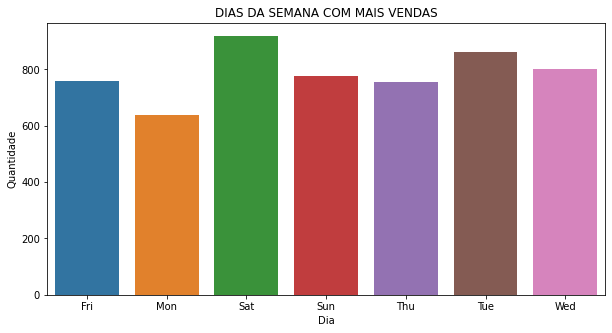

In [68]:
# DIAS DA SEMANA COM MAIS VENDAS
analise_semana = dados.groupby(by=['Dia']).sum()['Quantidade'].reset_index()
plt.figure(figsize=(10,5))
sns.barplot(analise_semana.Dia, analise_semana.Quantidade)
plt.title('DIAS DA SEMANA COM MAIS VENDAS')
plt.show()

In [69]:
# Acima, podemos analisar quais dias da semana, no geral, saem mais vendas.

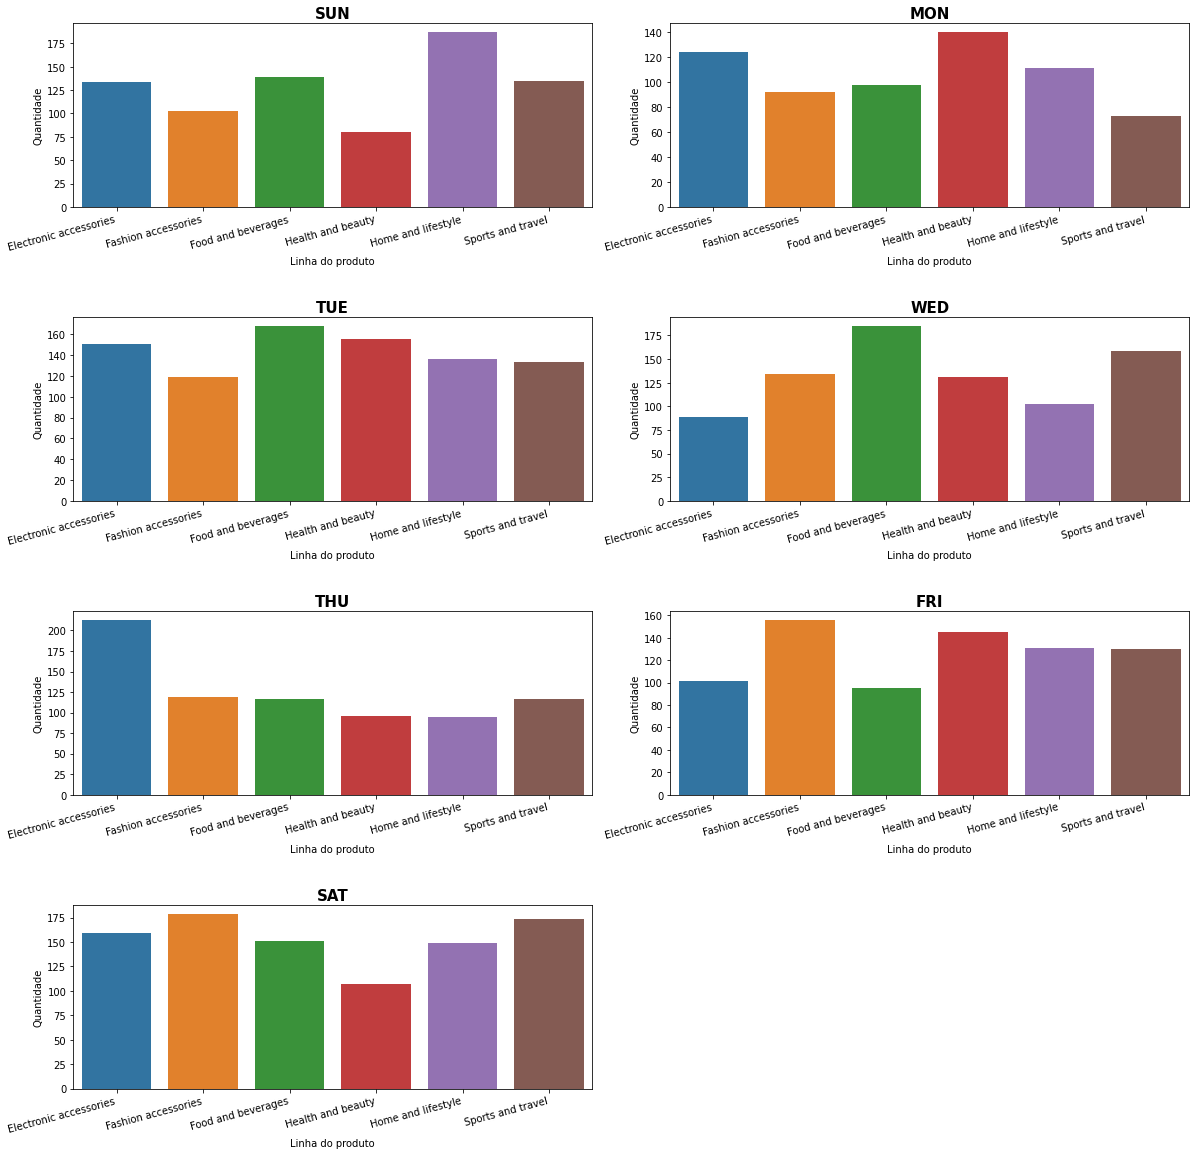

In [70]:
# DIAS DA SEMANA COM MAIS VENDAS POR LINHA DE PRODUTO
analise_semana = dados.groupby(by=['Dia', 'Linha do produto']).sum()[
    'Quantidade'].reset_index()
dias = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
fig, ax = plt.subplots(figsize=(20, 25))
plt.subplots_adjust(hspace=0.60, wspace=0.15)
for i in range(len(dias)):
    filtro = analise_semana['Dia'] == dias[i]
    plt.subplot(5, 2, i+1)
    plt.title((dias[i]).upper(), pad=5, size=15, fontdict={'weight': 'bold'})
    sns.barplot(
        analise_semana['Linha do produto'].loc[filtro], analise_semana.Quantidade)
    plt.xticks(rotation=15, ha='right')


In [71]:
# Podemos analisar agora, de forma mais detalhadas, a quantidade de vendas por linha do produto,
# destribuidas por cadas dia da semana. Podemos retirar vairios insights desse gráfico, tais como:
# "As pessoas procuram Fashion Accessories mais na sexta e no sábado", "Domingo há uma grande procura
# por Home and Lifestyle" ou até mesmo "Quinta, é o dia onde as pressoas compram mais produtos Electronic
# Avvessories".

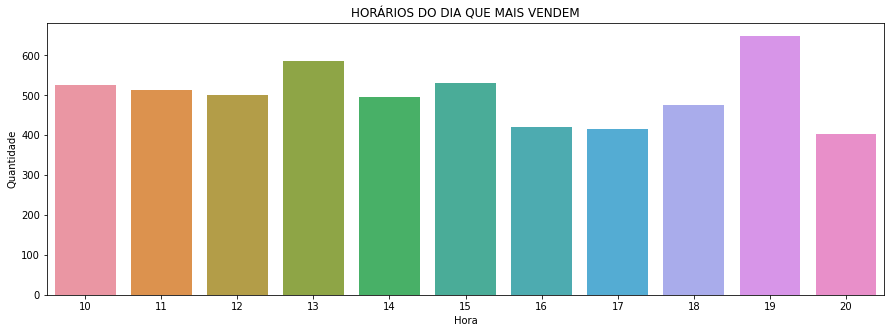

In [72]:
# HORÁRIOS DO DIA QUE MAIS VENDEM
dados['Hora'] = dados['Horário'].apply(lambda line: str(line)[0:2])
analise_hr = dados.groupby(by=['Hora']).sum()['Quantidade'].reset_index()
plt.figure(figsize=(15,5))
sns.barplot(analise_hr.Hora, analise_hr.Quantidade)
plt.title('HORÁRIOS DO DIA QUE MAIS VENDEM')
plt.show()

In [73]:
# Podemos observar através desse gráfico, a distribuição de vendas em relação aos horários do
# dia. Vemos uma grande quantidade de vendas no período das 13 e das 19 horas.

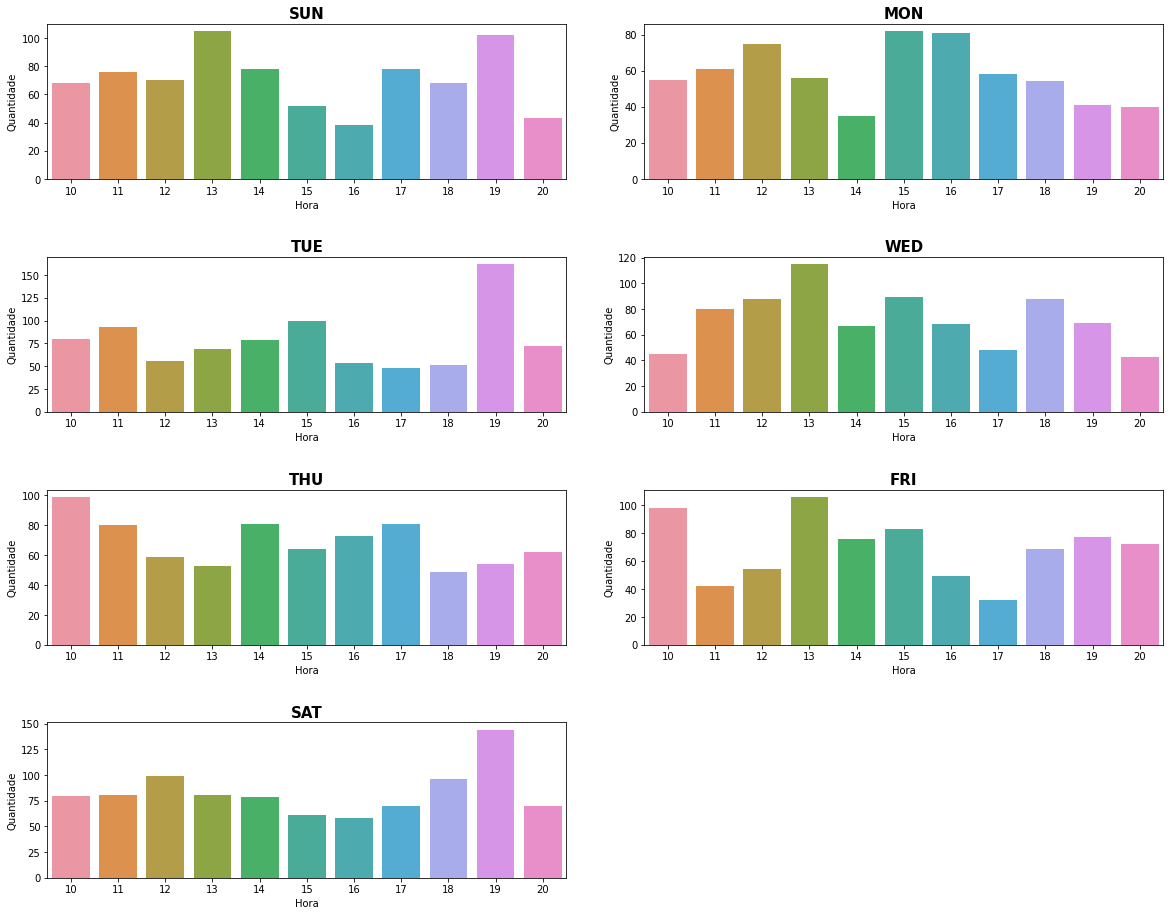

In [74]:
# HORARIOS QUE MAIS VENDEM EM RELAÇÃO AO DIA DA SEMANA 
analise_semana = dados.groupby(by=['Dia']).sum()['Quantidade'].reset_index()
fig, ax = plt.subplots(figsize=(20, 20))
plt.subplots_adjust(hspace=0.50, wspace=0.15)
analise_hr = dados.groupby(by=['Dia', 'Hora']).sum()['Quantidade'].reset_index()
dias = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
for i in range(len(analise_semana.Dia)):
    filtro = analise_hr['Dia'] == dias[i]
    plt.subplot(5, 2, i+1)
    plt.title((dias[i]).upper(), pad=5, size=15, fontdict={'weight': 'bold'})
    sns.barplot(analise_hr.Hora.loc[filtro], analise_hr.Quantidade)
    

In [75]:
# Aqui, observamos detalhadamente as vendas destribuidas nos dias, de acordo com seu horário.
# Podemos daqui, retirar insights de qual melhor horário para efetuar uma campanha de marketing.

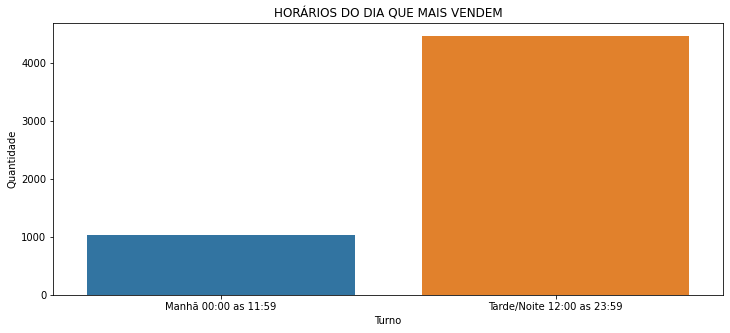

In [76]:
# TURNO COM MAIS VENDAS
dados['Turno'] = dados['Horário'].apply(lambda line: 'Manhã 00:00 as 11:59' if line < '12:00' else 'Tarde/Noite 12:00 as 23:59')
analise_hr = dados.groupby(by=['Turno']).sum()['Quantidade'].reset_index()
plt.figure(figsize=(12,5))
sns.barplot(analise_hr.Turno, analise_hr.Quantidade)
plt.title('HORÁRIOS DO DIA QUE MAIS VENDEM')
plt.show()

In [77]:
# Por fim, deixei um gráfico com o turno que as pessoas mais compram nesse supermercado.
# O turno da tarde/noite tem muito mais que o dobro de vendas do turno da manhã. Isso se 
# deu, devido ao pouco número de registro de vendas no período da manhã.

In [78]:
# Poderia ter retirado inúmero insights desse conjunto de dados para otimizar as vendas, promoções,
# campanhas de trafégo e marketing, entre outras coisas.